In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerMCDropout

In [3]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"training": True,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod,
	"learning_rate": 1e-4
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

dates = [2018, 2019]
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
#  	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:
	if type(dataset) == PA:
		exp = 2

	if type(dataset) == PADeforestationTime:
		# exp = 3 # uses past deforestation mask until 2020, which is a mistake. use it until 2018
		exp = 4 # uses past deforestation mask without dates.
		exp = 5 # uses past deforestation mask with dates. 38 epochs.
		exp = 5 # fixes mask.
		exp = 6 # uses past deforestation distance and past deforestation. didnt test it yet        
		exp = 8 # Uses fixed past deforestation distance and past deforestation. 98.9 mAP
		exp = 9 # dummy for coords. high mAP. 99.8.   
		exp = 10 # using fixed fixed past deforestation distance. mAP 90.7   
		exp = 12 # Multiple dates. using fixed fixed past deforestation distance. mAP reduced to 89.6
	if type(dataset) == PADistanceMap:
		exp = 7 # not so good result.
	if type(dataset) == PAMultipleDates:
		exp = 11 # Multiple dates. using fixed fixed past deforestation distance
		exp = 22
		exp = 50
		exp = 52
		# exp = 54
		exp = 56
		exp = 58
		# exp = 63
		# exp = 52
		# exp = 64
		# exp = 66
		exp = 66
		exp = 68
		
		# =============
		# exp = 72 # train 2015-2018
		# exp = 69 # train 2016-2018
		# exp = 70 # train 2017-2018
		
		# train 2018-2019. test 2018-2019
		# exp = 39 # old 
		exp = 76 # 88.4 mAP
		# exp = 71 # 89.5 mAP

		# =============
		
		### exp = 73
		# exp = 71
		# exp = 61

		exp = 77 # good?
		# exp = 78 # good but too short?

		exp = 90 # good result. label ok. f1 84.4 train 2018-2019
		exp = 92 # train 2017-2018
		exp = 93 # train 2016-2018
		exp = 94 # train 2015-2018
		
		exp = 96 # train 2018-2019
		exp = 97 # train 2017-2018
		exp = 98 # train 2016-2018
		exp = 99 # train 2015-2018


		exp = 103


		# train 2017-2018
		# exp = 138
		# exp = 140
		# exp = 147
	if type(dataset) == MTDeforestationTime:
		exp = 28
	if type(dataset) == MTMultipleDates:
		exp = 73 # train 2018-2019
		# exp = 74 # train 2016-2019
		# exp = 75 # train 2017-2019
		
		exp = 78 # 2019-2020

		# exp = 88 adds project past deforestation to label
		exp = 89 # ok label. so so result
		
		exp = 91 # ok label. Good result. 81.8 F1. train 2019-2020
		exp = 95 # train 2018-2019
		exp = 100 # train 2017-2019
		exp = 101 # train 2016-2019
		exp = 102 # train 2016-2019
		
		# train 2018-2019
		exp = 137

		exp = 117
		exp = 113
		exp = 110
		exp = 112
		exp = 116

	if type(dataset) == MAMultipleDates:
		exp = 146		
else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	# exp = 174
	exp = 175

trainer = TrainerMCDropout(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


{'training': True, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy', 'learning_rate': 0.0001}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp

175

In [7]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [8]:
# ic(type(dataset), exp, dataset.dates)


In [9]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [10]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [11]:

trainer.label_mask.dtype

dtype('uint8')

In [12]:

trainer.getLabelCurrentDeforestation()

In [13]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [14]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

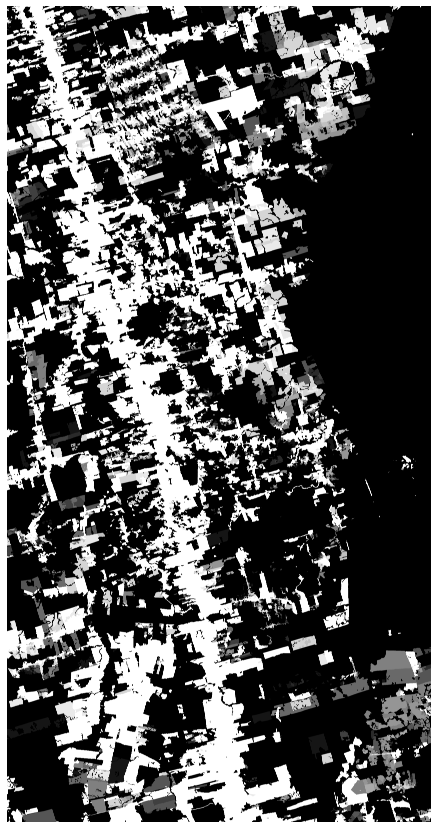

In [15]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [16]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [17]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [18]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


ic| im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| im_idx.shape: (17730, 9200, 2), im_idx.dtype: dtype('uint16')


In [19]:
if config["training"] == True:
    trainer.extractCoords()

ic| coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| coords.shape: (110896, 2), coords.dtype: dtype('uint16')


In [20]:
if config["training"] == True:
    trainer.trainTestSplit()

ic| self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [21]:
if config["training"] == True:
    trainer.label_mask.shape

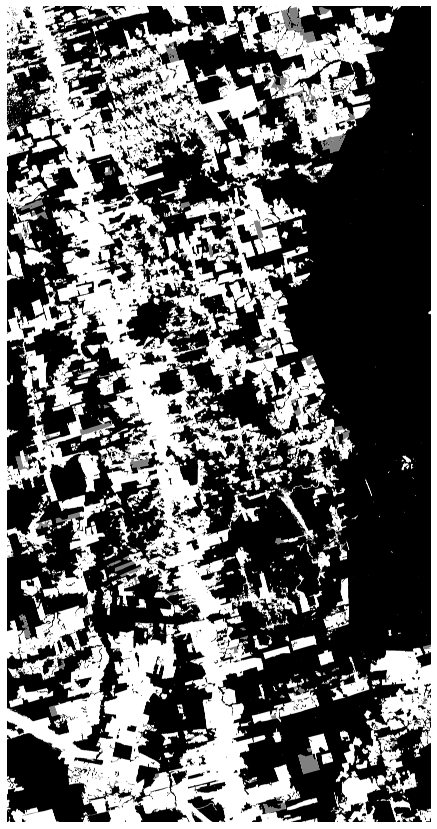

In [22]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [23]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [24]:
if config["training"] == True:
    print(trainer.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [25]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

training samples:  (3753, 3) validation samples:  (1032, 3)


In [26]:
if config["training"] == True:
    inputSnipShow = True

In [27]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [28]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [29]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

ic

[12084  2508     0]


| np.mean(image_patch[...,[1,2,3]]): 0.107682176
    np.mean(image_patch[...,[11,12,13]]): 0.22637562


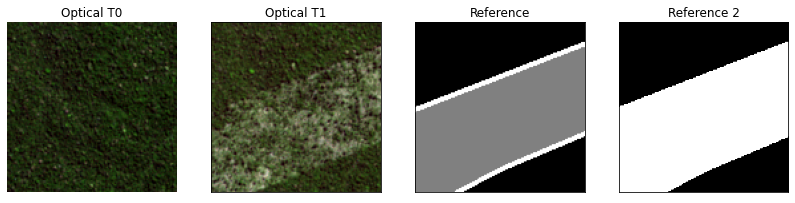

In [30]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


ic| np.mean(image_patch[...,[1,2,3]]): 0.2714837
    np.mean(image_patch[...,[11,12,13]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]


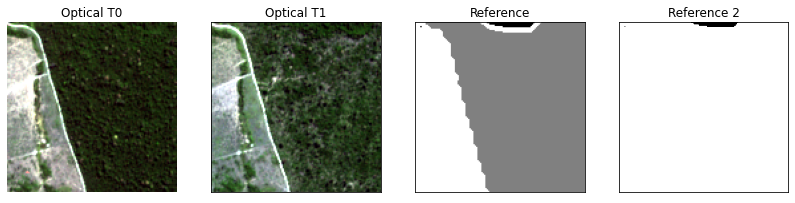

In [31]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


ic| np.mean(image_patch[...,[1,2,3]]): 0.15096879
    np.mean(image_patch[...,[11,12,13]]): 0.103304155


[3382 2128    0]


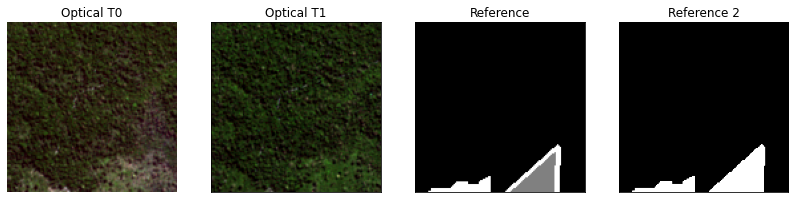

In [32]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

ic| np.mean(image_patch[

[ 608 6574    0]


...,[1,2,3]]): 0.09604081
    np.mean(image_patch[...,[11,12,13]]): 0.23388559


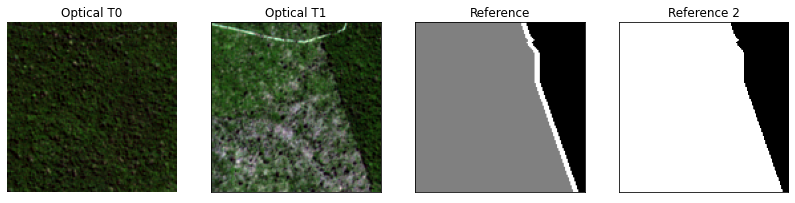

In [33]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [34]:
if config["training"] == True:
    trainer.getGenerators()


In [35]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [36]:
if config["training"] == True:
    print(trainer.path_exp)

D:/Jorge/datasets/deforestation/experiments/exp175


In [37]:
if config["training"] == True:
    print(trainer.channels)

21


In [38]:
if config["training"] == True:
    print(trainer.image_stack.shape)

(17730, 9200, 21)


In [39]:
if config["training"] == True:
    trainer.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


loss1 Tensor("loss/add:0", shape=(None, 128, 128, 3), dtype=float32)
loss2 Tensor("loss/mul_2:0", shape=(None, 128, 128, 3), dtype=float32)
loss3 Tensor("loss/Neg:0", shape=(None, 128, 128), dtype=float32)
loss1 Tensor("loss/add:0", shape=(None, 128, 128, 3), dtype=float32)
loss2 Tensor("loss/mul_2:0", shape=(None, 128, 128, 3), dtype=float32)
loss3 Tensor("loss/Neg:0", shape=(None, 128, 128), dtype=float32)
351/351 [==============================] - ETA: 0s - loss: 0.0966 - accuracy: 0.7144loss1 Tensor("loss/add:0", shape=(None, 128, 128, 3), dtype=float32)
loss2 Tensor("loss/mul_2:0", shape=(None, 128, 128, 3), dtype=float32)
loss3 Tensor("loss/Neg:0", shape=(None, 128, 128), dtype=float32)
351/351 [==============================] - 38s 93ms/step - loss: 0.0966 - accuracy: 0.7144 - val_loss: 0.0667 - val_accuracy: 0.8583

Epoch 00001: val_loss improved from inf to 0.06666, saving model to D:/Jorge/datasets/deforestation/experiments/exp175/models\resunet_0.h5
Epoch 2/100


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


351/351 [==============================] - 32s 91ms/step - loss: 0.0600 - accuracy: 0.8680 - val_loss: 0.0567 - val_accuracy: 0.8911

Epoch 00002: val_loss improved from 0.06666 to 0.05667, saving model to D:/Jorge/datasets/deforestation/experiments/exp175/models\resunet_0.h5
Epoch 3/100
351/351 [==============================] - 32s 90ms/step - loss: 0.0512 - accuracy: 0.8918 - val_loss: 0.0507 - val_accuracy: 0.9015

Epoch 00003: val_loss improved from 0.05667 to 0.05071, saving model to D:/Jorge/datasets/deforestation/experiments/exp175/models\resunet_0.h5
Epoch 4/100
351/351 [==============================] - 32s 91ms/step - loss: 0.0466 - accuracy: 0.9022 - val_loss: 0.0492 - val_accuracy: 0.9060

Epoch 00004: val_loss improved from 0.05071 to 0.04924, saving model to D:/Jorge/datasets/deforestation/experiments/exp175/models\resunet_0.h5
Epoch 5/100
351/351 [==============================] - 32s 91ms/step - loss: 0.0435 - accuracy: 0.9089 - val_loss: 0.0494 - val_accuracy: 0.9089


KeyboardInterrupt: 

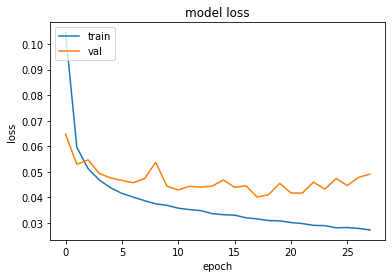

In [ ]:
if config["training"] == True:
    trainer.plotHistory()


In [ ]:
trainer.image_stack.shape

(17730, 9200, 21)

In [ ]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [ ]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [ ]:
trainer.image_stack.shape

(17730, 9200, 21)

In [ ]:
trainer.setPadding()

-30.0 -16.0


In [ ]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp174/models/resunet_0.h5'


time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [ ]:
trainer.loadPredictedProbabilities()

In [ ]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [ ]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [ ]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [ ]:
trainer.getMeanProb()

In [ ]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 4.005962e-15
    np.mean(value): 0.015201574
    np.max(value): 0.9999917


In [ ]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [ ]:
trainer.unpadMeanProb()

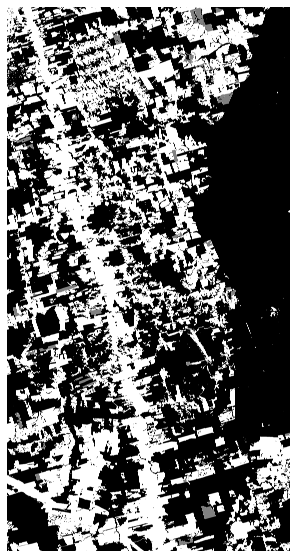

In [ ]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [ ]:
trainer.squeezeLabel()

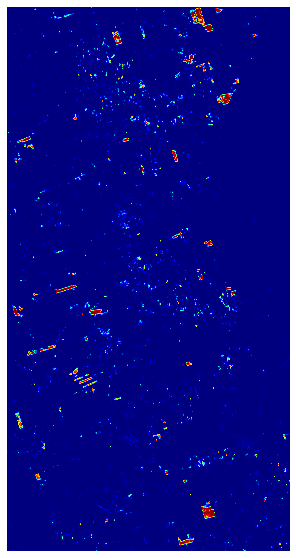

In [ ]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [ ]:
print(trainer.label_mask.shape)

(17730, 9200)


In [ ]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [ ]:
trainer.getMAP()

90.75


In [ ]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [ ]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 1)


In [ ]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

In [ ]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 1.1096956e-34
    np.mean(value): 0.015199395
    np.max(value): 1.0


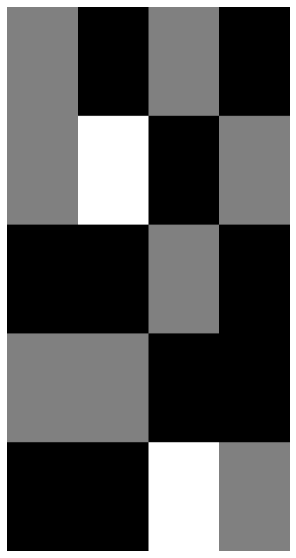

In [ ]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [ ]:
trainer.getLabelCurrentDeforestation()

In [ ]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161142907,   1973093], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [ ]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [ ]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161142907,   1973093], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161349829,   1766171], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162909078,    206922], dtype=int64))


In [ ]:
trainer.calculateMetrics()

ic| self.f1: 85.81, self.precision: 88.36, self.recall: 83.41


In [ ]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9426219,)
ic| f1_val: 85.61
    precision_val: 82.22
    recall_val: 89.28
    mAP_val: 89.09


In [ ]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [ ]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162588027,    527973], dtype=int64))


In [ ]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


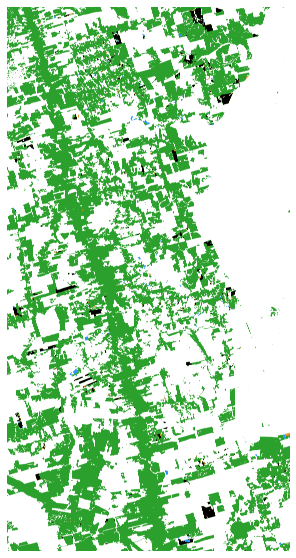

In [ ]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [ ]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [ ]:
trainer.setUncertainty()

In [ ]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.009907682
    np.max(value): 0.36787948


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

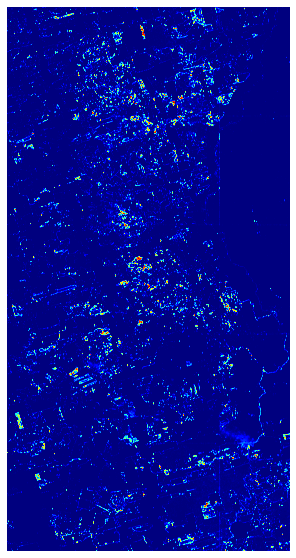

In [ ]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



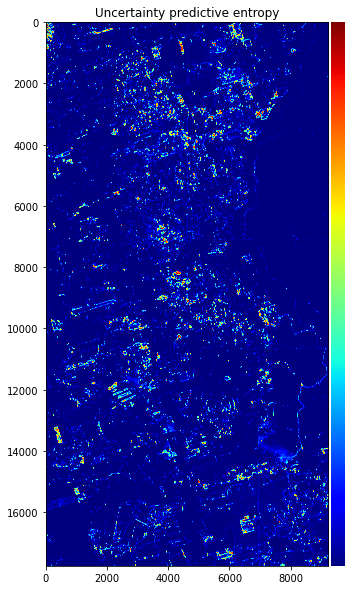

In [ ]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [ ]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54136852,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


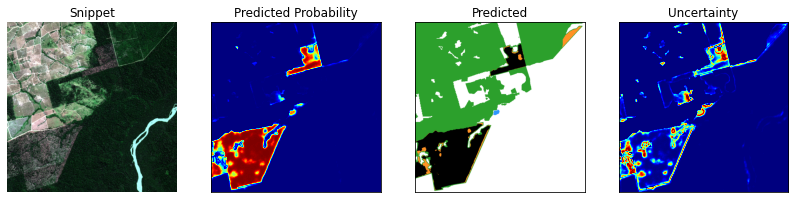

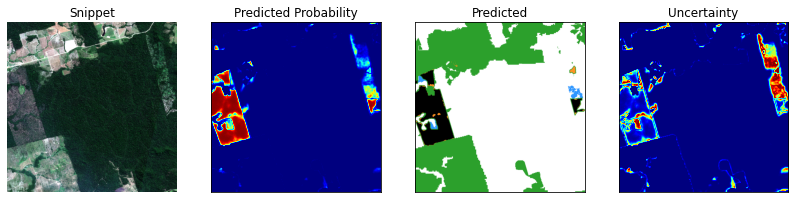

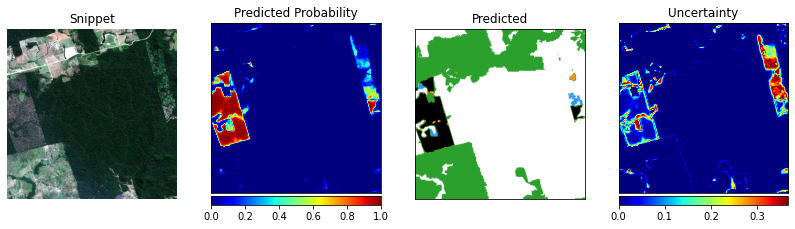

In [ ]:
trainer.logger.plotCropSample(trainer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


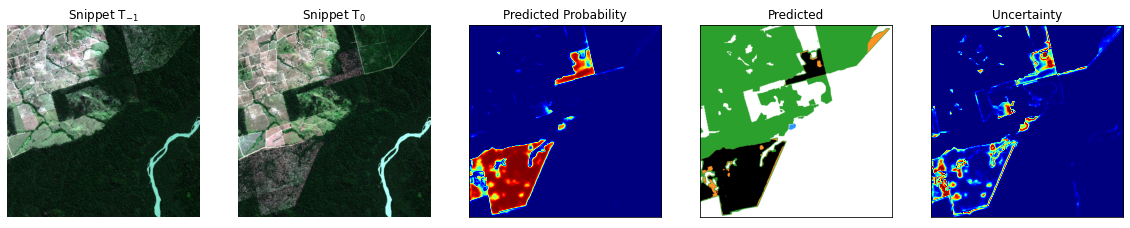

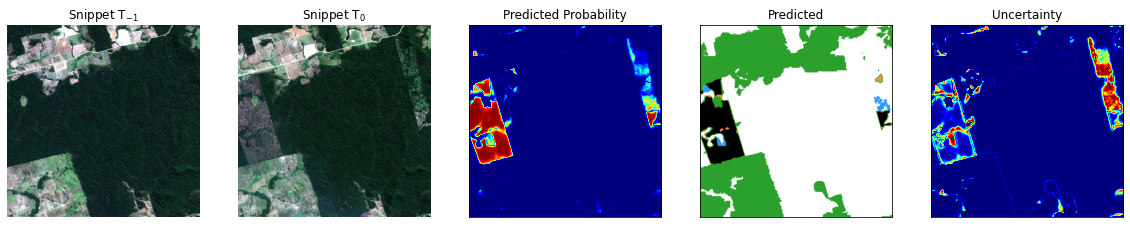

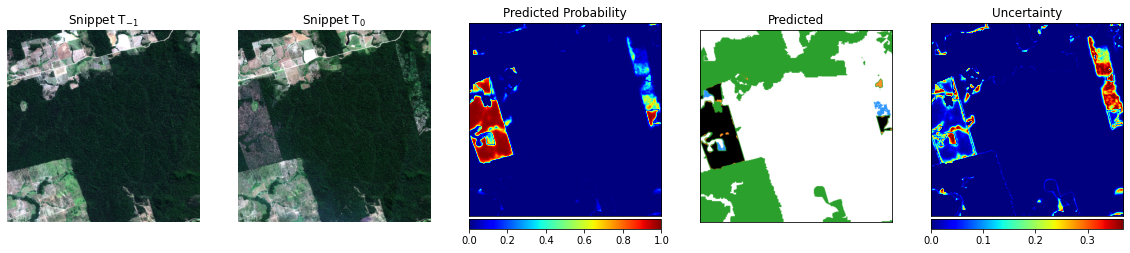

In [ ]:
trainer.logger.plotCropSampleT0T1(trainer)

In [ ]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [ ]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [ ]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 1.319089e-13
    np.mean(value): 0.01344099
    np.max(value): 0.36787948


Get precision-recall threshold

In [ ]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54136852,)
    self.label_mask_current_deforestation_test.shape: (54136852,)


[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0025
(43959278,) (43959278,)


ic| label_current_deforestation_test_classified_incorrect.shape: (10177574,)
    predicted_test_classified_incorrect.shape: (10177574,)


cm_correct [[43940389        0]
 [     915    17974]]


ic| TP_H + FN_H + FP_H + TN_H: 10177574
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 10177574
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[9380522   80779]
 [ 121067  595206]]
[1.         0.95155911 0.02444903 0.18799715 0.88050179 0.83097646]
threshold 0.005
(45487973,) (45487973,)


ic| label_current_deforestation_test_classified_incorrect.shape: (8648879,)
    predicted_test_classified_incorrect.shape: (8648879,)


cm_correct [[45422846        0]
 [    1473    63654]]


ic| TP_H + FN_H + FP_H + TN_H: 8648879
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 8648879
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[7898065   80779]
 [ 120509  549526]]
[1.         0.97738265 0.086585   0.15975955 0.87184141 0.82014522]
threshold 0.0075
(46365121,) (46365121,)


ic| label_current_deforestation_test_classified_incorrect.shape: (7771731,)
    predicted_test_classified_incorrect.shape: (7771731,)


cm_correct [[46270773        0]
 [    2248    92100]]


ic| TP_H + FN_H + FP_H + TN_H: 7771731
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 7771731
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[7050138   80779]
 [ 119734  521080]]
[1.         0.97617332 0.12527851 0.14355713 0.86578418 0.81315327]
threshold 0.01
(46990041,) (46990041,)


ic| label_current_deforestation_test_classified_incorrect.shape: (7146811,)
    predicted_test_classified_incorrect.shape: (7146811,)


cm_correct [[46872894        0]
 [    2869   114278]]


ic| TP_H + FN_H + FP_H + TN_H: 7146811
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 7146811
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[6448017   80779]
 [ 119113  498902]]
[1.         0.9755094  0.15544601 0.13201379 0.86064922 0.8072652 ]
threshold 0.015
(47877014,) (47877014,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6259838,)
    predicted_test_classified_incorrect.shape: (6259838,)


cm_correct [[47721001        0]
 [    3922   152091]]


ic| TP_H + FN_H + FP_H + TN_H: 6259838
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 6259838
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[5599910   80779]
 [ 118060  461089]]
[1.         0.97486107 0.20688093 0.11562989 0.85092495 0.79614918]
threshold 0.025
(48983743,) (48983743,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5153109,)
    predicted_test_classified_incorrect.shape: (5153109,)


cm_correct [[48772469        4]
 [    5736   205534]]


ic| TP_H + FN_H + FP_H + TN_H: 5153109
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 5153109
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[4548442   80775]
 [ 116246  407646]]
[0.99998054 0.97284991 0.27957647 0.09518671 0.83462013 0.77811076]
threshold 0.05
(50432110,) (50432110,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3704742,)
    predicted_test_classified_incorrect.shape: (3704742,)


cm_correct [[50140107      284]
 [    9792   281927]]


ic| TP_H + FN_H + FP_H + TN_H: 3704742
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 3704742
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[3180804   80495]
 [ 112190  331253]]
[0.99899366 0.96643345 0.38348963 0.0684329  0.80450421 0.74700243]
threshold 0.08
(51362629,) (51362629,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2774223,)
    predicted_test_classified_incorrect.shape: (2774223,)


cm_correct [[51007151     1555]
 [   13615   340308]]


ic| TP_H + FN_H + FP_H + TN_H: 2774223
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 2774223
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[2313760   79224]
 [ 108367  272872]]
[0.99545139 0.96153118 0.46290205 0.05124463 0.77499318 0.71575049]
threshold 0.1
(51769076,) (51769076,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2367776,)
    predicted_test_classified_incorrect.shape: (2367776,)


cm_correct [[51377550     3202]
 [   15721   372603]]


ic| TP_H + FN_H + FP_H + TN_H: 2367776
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 2367776
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[1943361   77577]
 [ 106261  240577]]
[0.99147962 0.95951577 0.50683115 0.04373686 0.75616525 0.6936293 ]
threshold 0.15
(52474876,) (52474876,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1661976,)
    predicted_test_classified_incorrect.shape: (1661976,)
ic

cm_correct [[52000103     9010]
 [   21180   444583]]
cm_incorrect [[1320808   71769]
 [ 100802  168597]]


| TP_H + FN_H + FP_H + TN_H: 1661976
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1661976
    len(label_mask_current_deforestation_test): 54136852


[0.98013638 0.95452623 0.60474154 0.03069953 0.70141784 0.62582638]
threshold 0.2
(52912894,) (52912894,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1223958,)
    predicted_test_classified_incorrect.shape: (1223958,)
ic| TP_H + FN_H + FP_H + TN_H: 1223958
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1223958
    len(label_mask_current_deforestation_test): 54136852


cm_correct [[52367206    19055]
 [   26993   499640]]
cm_incorrect [[953705  61724]
 [ 94989 113540]]
[0.96326357 0.94874419 0.67963252 0.02260859 0.64782271 0.54448062]
threshold 0.225
(53090036,) (53090036,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1046816,)
    predicted_test_classified_incorrect.shape: (1046816,)
ic| TP_H + FN_H + FP_H + TN_H: 1046816
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1046816
    len(label_mask_current_deforestation_test): 54136852


cm_correct [[52511573    25660]
 [   30347   522456]]
cm_incorrect [[809338  55119]
 [ 91635  90724]]
[0.95318509 0.94510341 0.71066785 0.01933648 0.62206619 0.49750218]
threshold 0.25
(53249190,) (53249190,)


ic| label_current_deforestation_test_classified_incorrect.shape: (887662,)
    predicted_test_classified_incorrect.shape: (887662,)
ic| TP_H + FN_H + FP_H + TN_H: 887662
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 887662
    len(label_mask_current_deforestation_test): 54136852


cm_correct [[52638782    33392]
 [   34024   542992]]
cm_incorrect [[682129  47387]
 [ 87958  70188]]
[0.9420664  0.94103456 0.73860183 0.01639663 0.59696364 0.44381774]
threshold 0.27
(53369305,) (53369305,)


ic| label_current_deforestation_test_classified_incorrect.shape: (767547,)
    predicted_test_classified_incorrect.shape: (767547,)
ic| TP_H + FN_H + FP_H + TN_H: 767547
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 767547
    len(label_mask_current_deforestation_test): 54136852


cm_correct [[52732040    41185]
 [   37540   558540]]
cm_incorrect [[588871  39594]
 [ 84442  54640]]
[0.93132686 0.93702188 0.75975091 0.0141779  0.57983318 0.39286177]
threshold 0.3
(53540533,) (53540533,)


ic| label_current_deforestation_test_classified_incorrect.shape: (596319,)
    predicted_test_classified_incorrect.shape: (596319,)
ic| TP_H + FN_H + FP_H + TN_H: 596319
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 596319
    len(label_mask_current_deforestation_test): 54136852


cm_correct [[52861830    54512]
 [   43827   580364]]
cm_incorrect [[459081  26267]
 [ 78155  32816]]
[0.91413756 0.92978591 0.78943689 0.01101503 0.55542203 0.2957169 ]
threshold 0.34
(53773114,) (53773114,)


ic| label_current_deforestation_test_classified_incorrect.shape: (363738,)
    predicted_test_classified_incorrect.shape: (363738,)
ic| TP_H + FN_H + FP_H + TN_H: 363738
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 363738
    len(label_mask_current_deforestation_test): 54136852


cm_correct [[53031737    76427]
 [   56607   608343]]
cm_incorrect [[289174   4352]
 [ 65375   4837]]
[0.88839026 0.91487029 0.82749516 0.00671886 0.52639025 0.06889136]
threshold 0.36
(53948024,) (53948024,)


ic| label_current_deforestation_test_classified_incorrect.shape: (188828,)
    predicted_test_classified_incorrect.shape: (188828,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 188828
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 188828
    len(label_mask_current_deforestation_test): 54136852


cm_correct [[53169264    80779]
 [   84801   613180]]
cm_incorrect [[151647      0]
 [ 37181      0]]
[0.88359687 0.87850529 0.83407467 0.00348798        nan 0.        ]
threshold 0.3648794801235199
(54021478,) (54021478,)


ic| label_current_deforestation_test_classified_incorrect.shape: (115374,)
    predicted_test_classified_incorrect.shape: (115374,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 115374
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 115374
    len(label_mask_current_deforestation_test): 54136852


cm_correct [[53228435    80779]
 [   99084   613180]]
cm_incorrect [[92476     0]
 [22898     0]]
[0.88359687 0.86088866 0.83407467 0.00213115        nan 0.        ]
threshold 0.3663794801235199
(54055878,) (54055878,)


ic| label_current_deforestation_test_classified_incorrect.shape: (80974,)
    predicted_test_classified_incorrect.shape: (80974,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 80974
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 80974
    len(label_mask_current_deforestation_test): 54136852


cm_correct [[53255999    80779]
 [  105920   613180]]
cm_incorrect [[64912     0]
 [16062     0]]
[0.88359687 0.85270477 0.83407467 0.00149573        nan 0.        ]


In [ ]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54136852,)
    self.label_mask_current_deforestation_test.shape: (54136852,)


threshold 0.0025
(54136852,) (54136852,)
cm_audited [[53401690        0]
 [     915   734247]]
[1.         0.99875538]
threshold 0.005
(54136852,) (54136852,)
cm_audited [[53401690        0]
 [    1473   733689]]
[1.         0.99799636]
threshold 0.0075
(54136852,) (54136852,)
cm_audited [[53401690        0]
 [    2248   732914]]
[1.         0.99694217]
threshold 0.01
(54136852,) (54136852,)
cm_audited [[53401690        0]
 [    2869   732293]]
[1.         0.99609746]
threshold 0.015
(54136852,) (54136852,)
cm_audited [[53401690        0]
 [    3922   731240]]
[1.         0.99466512]
threshold 0.025
(54136852,) (54136852,)
cm_audited [[53401686        4]
 [    5736   729426]]
[0.99999452 0.99219764]
threshold 0.05
(54136852,) (54136852,)
cm_audited [[53401406      284]
 [    9792   725370]]
[0.99960863 0.98668049]
threshold 0.08
(54136852,) (54136852,)
cm_audited [[53400135     1555]
 [   13615   721547]]
[0.99784954 0.98148027]
threshold 0.1
(54136852,) (54136852,)
cm_audited [[533984

ic| metric_values_audited: array([[1.        , 0.99875538],
                                  [1.        , 0.99799636],
                                  [1.        , 0.99694217],
                                  [1.        , 0.99609746],
                                  [1.        , 0.99466512],
                                  [0.99999452, 0.99219764],
                                  [0.99960863, 0.98668049],
                                  [0.99784954, 0.98148027],
                                  [0.99556904, 0.9786156 ],
                                  [0.9875379 , 0.97119002],
                                  [0.97379762, 0.96328292],
                                  [0.96487217, 0.95872066],
                                  [0.95453964, 0.95371904],
                                  [0.94425472, 0.94893642],
                                  [0.92691262, 0.94038457],
                                  [0.89876977, 0.92300064],
                                  [0.889

cm_audited [[53320911    80779]
 [  105920   629242]]
[0.88623013 0.85592291]


In [ ]:
trainer.setPlotLimsForUncertaintyAA()

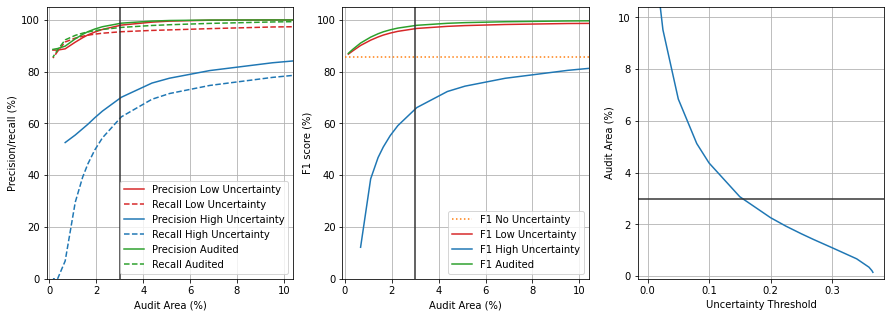

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

In [ ]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 0.3663794801235199)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.1408715596097929
threshold 0.1408715596097929
(52375440,) (52375440,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1761412,)
    predicted_test_classified_incorrect.shape: (1761412,)


cm_correct [[51914826     7789]
 [   20170   432655]]


ic| TP_H + FN_H + FP_H + TN_H: 1761412
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1761412
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[1406085   72990]
 [ 101812  180525]]
[0.98231557 0.95545741 0.58851654 0.03253628 0.71208804 0.63939547]
0.22700792051372695
threshold 0.22700792051372695
(53103340,) (53103340,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1033512,)
    predicted_test_classified_incorrect.shape: (1033512,)
ic| TP_H + FN_H + FP_H + TN_H: 1033512
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1033512
    len(label_mask_current_deforestation_test): 54136852


cm_correct [[52522333    26234]
 [   30613   524160]]
cm_incorrect [[798578  54545]
 [ 91369  89020]]
[0.95233596 0.94481887 0.71298571 0.01909073 0.62006757 0.49348907]
0.08763636090393405
threshold 0.08763636090393405
(51529136,) (51529136,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2607716,)
    predicted_test_classified_incorrect.shape: (2607716,)


cm_correct [[51159546     2121]
 [   14436   353033]]


ic| TP_H + FN_H + FP_H + TN_H: 2607716
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 2607716
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[2161365   78658]
 [ 107546  260147]]
[0.99402794 0.96071505 0.48021116 0.04816896 0.76783696 0.70751143]
0.16660897810638475
threshold 0.16660897810638475
(52636841,) (52636841,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1500011,)
    predicted_test_classified_incorrect.shape: (1500011,)
ic

cm_correct [[52137686    11659]
 [   23030   464466]]
cm_incorrect [[1183225   69120]
 [  98952  148714]]


| TP_H + FN_H + FP_H + TN_H: 1500011
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1500011
    len(label_mask_current_deforestation_test): 54136852


[0.97551273 0.95275859 0.63178728 0.02770776 0.68269416 0.60046191]
0.1564243095129853
threshold 0.1564243095129853
(52540314,) (52540314,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1596538,)
    predicted_test_classified_incorrect.shape: (1596538,)
ic

cm_correct [[52056006     9927]
 [   21856   452525]]
cm_incorrect [[1264905   70852]
 [ 100126  160655]]


| TP_H + FN_H + FP_H + TN_H: 1596538
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1596538
    len(label_mask_current_deforestation_test): 54136852


[0.97853399 0.95392733 0.6155446  0.02949078 0.6939531  0.61605332]
0.1541398154300627
threshold 0.1541398154300627
(52517341,) (52517341,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1619511,)
    predicted_test_classified_incorrect.shape: (1619511,)
ic

cm_correct [[52036344     9611]
 [   21601   449785]]
cm_incorrect [[1284567   71168]
 [ 100381  163395]]


| TP_H + FN_H + FP_H + TN_H: 1619511
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1619511
    len(label_mask_current_deforestation_test): 54136852


[0.97907905 0.95417556 0.61181753 0.02991513 0.69659324 0.61944605]
0.14907179267814824
threshold 0.14907179267814824
(52465118,) (52465118,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1671734,)
    predicted_test_classified_incorrect.shape: (1671734,)
ic

cm_correct [[51991745     8881]
 [   21077   443415]]
cm_incorrect [[1329166   71898]
 [ 100905  169765]]


| TP_H + FN_H + FP_H + TN_H: 1671734
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1671734
    len(label_mask_current_deforestation_test): 54136852


[0.98036463 0.95462355 0.60315277 0.03087978 0.70248652 0.62720287]
0.15328885398669873
threshold 0.15328885398669873
(52508727,) (52508727,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1628125,)
    predicted_test_classified_incorrect.shape: (1628125,)
ic

cm_correct [[52029007     9491]
 [   21520   448709]]
cm_incorrect [[1291904   71288]
 [ 100462  164471]]


| TP_H + FN_H + FP_H + TN_H: 1628125
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1628125
    len(label_mask_current_deforestation_test): 54136852


[0.97928634 0.95423506 0.61035391 0.03007425 0.69762342 0.62080224]
0.15360137937412063
threshold 0.15360137937412063
(52511872,) (52511872,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624980,)
    predicted_test_classified_incorrect.shape: (1624980,)
ic

cm_correct [[52031665     9543]
 [   21554   449110]]
cm_incorrect [[1289246   71236]
 [ 100428  164070]]


| TP_H + FN_H + FP_H + TN_H: 1624980
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1624980
    len(label_mask_current_deforestation_test): 54136852


[0.97919342 0.95420512 0.61089937 0.03001615 0.69726229 0.62030715]
0.1536973918110215
threshold 0.1536973918110215
(52512796,) (52512796,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624056,)
    predicted_test_classified_incorrect.shape: (1624056,)
ic

cm_correct [[52032453     9549]
 [   21565   449229]]
cm_incorrect [[1288458   71230]
 [ 100417  163951]]


| TP_H + FN_H + FP_H + TN_H: 1624056
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1624056
    len(label_mask_current_deforestation_test): 54136852


[0.97918601 0.9541944  0.61106124 0.02999908 0.69712689 0.62016205]
0.1538663825960695
threshold 0.1538663825960695
(52514546,) (52514546,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1622306,)
    predicted_test_classified_incorrect.shape: (1622306,)


cm_correct [[52033938     9578]
 [   21584   449446]]


ic| TP_H + FN_H + FP_H + TN_H: 1622306
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1622306
    len(label_mask_current_deforestation_test): 54136852


cm_incorrect [[1286973   71201]
 [ 100398  163734]]
[0.97913399 0.95417702 0.61135641 0.02996676 0.69693319 0.6198946 ]
0.15373072742405555
threshold 0.15373072742405555
(52513135,) (52513135,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623717,)
    predicted_test_classified_incorrect.shape: (1623717,)
ic

cm_correct [[52032741     9553]
 [   21567   449274]]
cm_incorrect [[1288170   71226]
 [ 100415  163906]]


| TP_H + FN_H + FP_H + TN_H: 1623717
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1623717
    len(label_mask_current_deforestation_test): 54136852


[0.97917952 0.95419473 0.61112245 0.02999282 0.69708079 0.62010207]
0.15366405619798743
threshold 0.15366405619798743
(52512457,) (52512457,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624395,)
    predicted_test_classified_incorrect.shape: (1624395,)
ic

cm_correct [[52032166     9546]
 [   21560   449185]]
cm_incorrect [[1288745   71233]
 [ 100422  163995]]


| TP_H + FN_H + FP_H + TN_H: 1624395
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1624395
    len(label_mask_current_deforestation_test): 54136852
ic| self.threshold_optimal: 0.1536973918110215


[0.97919042 0.95420026 0.61100138 0.03000535 0.69717466 0.62021353]


In [ ]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.1536973918110215
(52512796,) (52512796,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624056,)
    predicted_test_classified_incorrect.shape: (1624056,)
ic

cm_correct [[52032453     9549]
 [   21565   449229]]
cm_incorrect [[1288458   71230]
 [ 100417  163951]]


| TP_H + FN_H + FP_H + TN_H: 1624056
    len(label_mask_current_deforestation_test): 54136852
ic| TP_H + FN_H + FP_H + TN_H: 1624056
    len(label_mask_current_deforestation_test): 54136852


[0.97918601 0.9541944  0.61106124 0.02999908 0.69712689 0.62016205]
threshold 0.1536973918110215
(54136852,) (54136852,)


ic| self.m_optimal: {'AA': array([0.02999908]),
                     'f1': 85.81,
                     'f1_H': array([0.65639607]),
                     'f1_L': array([0.96652868]),
                     'precision_H': array([0.69712689]),
                     'precision_L': array([0.97918601]),
                     'recall_H': array([0.62016205]),
                     'recall_L': array([0.9541944]),
                     'recall_Ltotal': array([0.61106124])}
ic| self.m_audited_optimal: {'f1': array([0.97866432]),
                             'precision': array([0.9867952]),
                             'recall': array([0.97066633])}


cm_audited [[53392141     9549]
 [   21565   713597]]
[0.9867952  0.97066633]


{'metrics': {'precision_L': array([0.97918601]),
  'recall_L': array([0.9541944]),
  'recall_Ltotal': array([0.61106124]),
  'AA': array([0.02999908]),
  'precision_H': array([0.69712689]),
  'recall_H': array([0.62016205]),
  'f1_L': array([0.96652868]),
  'f1_H': array([0.65639607]),
  'f1': 85.81},
 'metrics_audited': {'precision': array([0.9867952]),
  'recall': array([0.97066633]),
  'f1': array([0.97866432])},
 'exp': 174}